In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

Library Selection and Document read

In [56]:
df=pd.read_csv('/content/sample_data/Melbourne_housing_FULL.csv')
df_copy=df.copy()

Some Information About Variables in Dataset

In [58]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [59]:
print(df_copy.size)
print(df_copy.shape)
print(df_copy.ndim)

731997
(34857, 21)
2


In [60]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


Converting Objects to Categorical Variables

In [61]:
print(df_copy.select_dtypes(['object']).columns)
obj_to_cat=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname']


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [62]:
for colname in obj_to_cat:
    df_copy[colname]=df_copy[colname].astype('category')

Duplicated Variable Detection and Dropping

In [63]:
df_copy.duplicated().sum()

1

In [64]:
df_copy.loc[df_copy.duplicated(keep=False),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [65]:
df_copy.drop_duplicates(inplace=True)

Unique Variable Numbers

In [66]:
df_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

Seperating Categorical and Numerical Values

In [8]:
num_cols=["Rooms","Distance","Price","Postcode","Bedroom2","Bathroom","Car","Landsize","BuildingArea" ,"YearBuilt","Lattitude","Longtitude",
            "Propertycount"]
cat_cols=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea','Regionname']

Outlier Detection and Handling

In [68]:
def OutlierThershold(dataframe,col_name):
  zscore1=3
  zscore2=-3
  return zscore1,zscore2



In [69]:
def detection_outlier(dataframe,col_name):
  zscore1,zscore2= OutlierThershold(dataframe,col_name)

  if dataframe[(((dataframe[col_name]-dataframe[col_name].mean())/dataframe[col_name].std()>zscore1)|((dataframe[col_name]-dataframe[col_name].mean())/dataframe[col_name].std()<zscore2))].any(axis=None):
    return True
  else:
    return False


In [70]:
for col in num_cols:
  print(col,detection_outlier(df_copy,col))


Rooms True
Distance True
Price True
Postcode True
Bedroom2 True
Bathroom True
Car True
Landsize True
BuildingArea True
YearBuilt True
Lattitude True
Longtitude True
Propertycount True


<ipython-input-69-9f61ea11d4b1>:4: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  if dataframe[(((dataframe[col_name]-dataframe[col_name].mean())/dataframe[col_name].std()>zscore1)|((dataframe[col_name]-dataframe[col_name].mean())/dataframe[col_name].std()<zscore2))].any(axis=None):
<ipython-input-69-9f61ea11d4b1>:4: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  if dataframe[(((dataframe[col_name]-dataframe[col_name].mean())/dataframe[col_name].std()>zscore1)|((dataframe[col_name]-dataframe[col_name].mean())/dataframe[col_name].std()<zscore2))].any(ax

In [71]:
def out_replacement(dataframe,variables):

  zscore1,zscore2= OutlierThershold(dataframe,variables)
  dataframe.loc[((dataframe[variables]-dataframe[variables].mean())/dataframe[variables].std()>zscore1),variables]<zscore1
  dataframe.loc[((dataframe[variables]-dataframe[variables].mean())/dataframe[variables].std()<zscore2),variables]>zscore2



In [72]:
for col in num_cols:
  print(col,out_replacement(df_copy,col))

Rooms None
Distance None
Price None
Postcode None
Bedroom2 None
Bathroom None
Car None
Landsize None
BuildingArea None
YearBuilt None
Lattitude None
Longtitude None
Propertycount None


Missing Values Detection and Handling

In [73]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [74]:
df_copy.isnull().mean()*100


Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.829814
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.574134
Bathroom         23.599954
Car              25.040165
Landsize         33.882258
BuildingArea     60.577806
YearBuilt        55.387882
CouncilArea       0.008607
Lattitude        22.882717
Longtitude       22.882717
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [75]:
Dropping_Value=["Price"]
df_copy.dropna(subset=Dropping_Value,inplace=True)

In [76]:
nums_new=df_copy[num_cols]

In [77]:
nums_new.isnull().sum()

Rooms                0
Distance             1
Price                0
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
Lattitude         6254
Longtitude        6254
Propertycount        3
dtype: int64

In [78]:
nums_new=nums_new.apply(lambda x: x.fillna(x.mean()),axis=0)
nums_new.head()

,Rooms,Distance,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,2.5,1480000.0,3067.0,2.0,1.0,1.0,202.0,156.834586,1966.609153,-37.7996,144.9984,4019.0
2,2,2.5,1035000.0,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,-37.8079,144.9934,4019.0
4,3,2.5,1465000.0,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,-37.8093,144.9944,4019.0
5,3,2.5,850000.0,3067.0,3.0,2.0,1.0,94.0,156.834586,1966.609153,-37.7969,144.9969,4019.0
6,4,2.5,1600000.0,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,-37.8072,144.9941,4019.0


In [79]:
cat_cols_new=df_copy.select_dtypes("category")

In [80]:
cat_cols_new=cat_cols_new.apply(lambda x:x.fillna(x.mode()))

In [81]:
df_new_copy=pd.concat([cat_cols_new,nums_new],axis=1)

Data Visualization(Price variable)

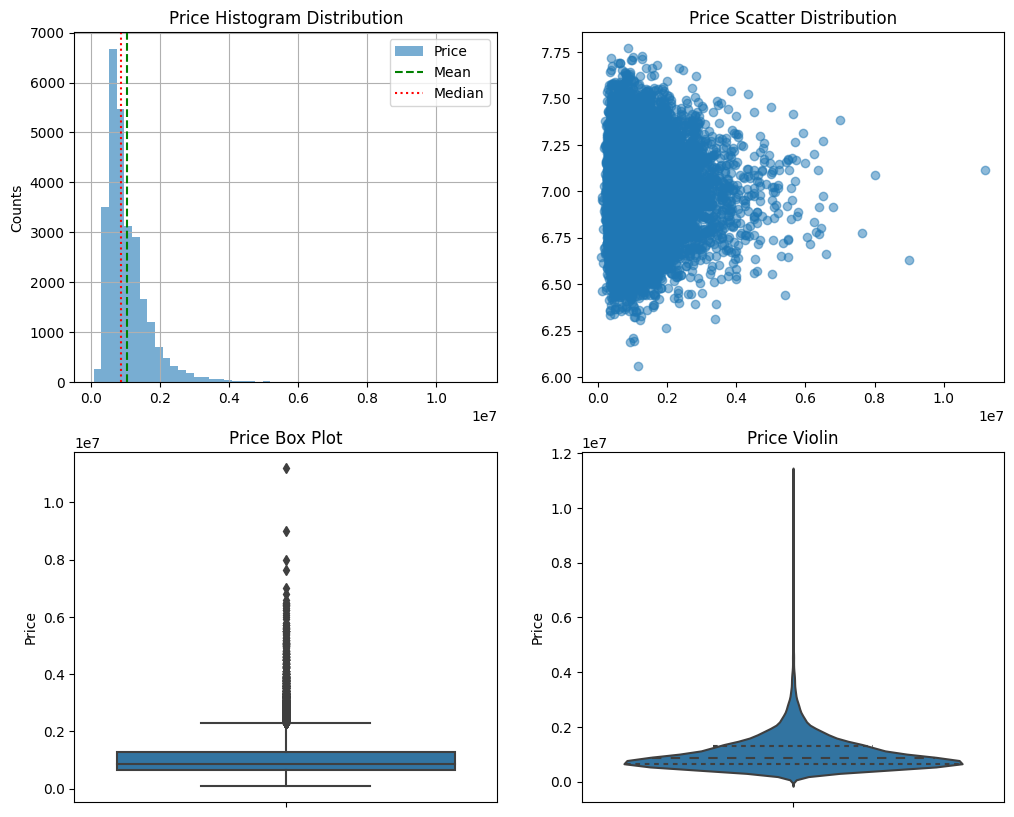

In [82]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
df_new_copy["Price"].hist(bins=50,label="Price",alpha=0.6)
plt.axvline(np.mean(df_new_copy["Price"]),ls="--",c="g",label="Mean")
plt.axvline(np.median(df_new_copy["Price"]),ls=":",c="r",label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()

plt.subplot(2,2,2)
plt.scatter(df_new_copy["Price"],np.random.normal(7,0.2,size=df_copy.shape[0]),alpha=0.5)
plt.title("Price Scatter Distribution");

plt.subplot(2,2,3)
sns.boxplot(y="Price",data=df_new_copy)
plt.title("Price Box Plot");

plt.subplot(2,2,4)
sns.violinplot(y="Price",data=df_new_copy,inner="quartile",bw=0.2)
plt.title("Price Violin");

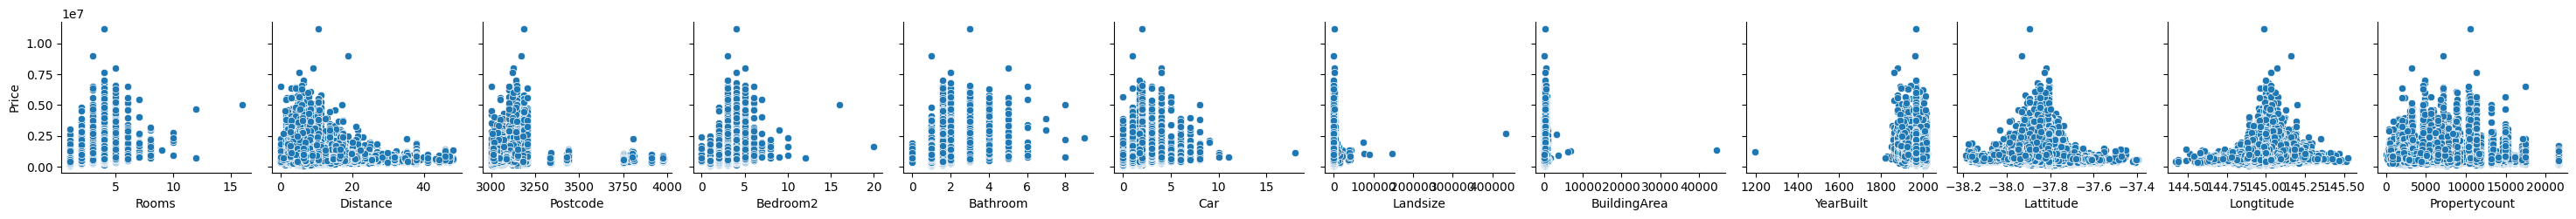

In [83]:
sns.pairplot(data=df_new_copy,
             y_vars=["Price"],
             x_vars=["Rooms","Distance","Postcode","Bedroom2","Bathroom","Car","Landsize","BuildingArea" ,"YearBuilt","Lattitude","Longtitude",
            "Propertycount"])

Heatmap

<ipython-input-84-99c832d73660>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_new_copy.corr()


<Axes: >

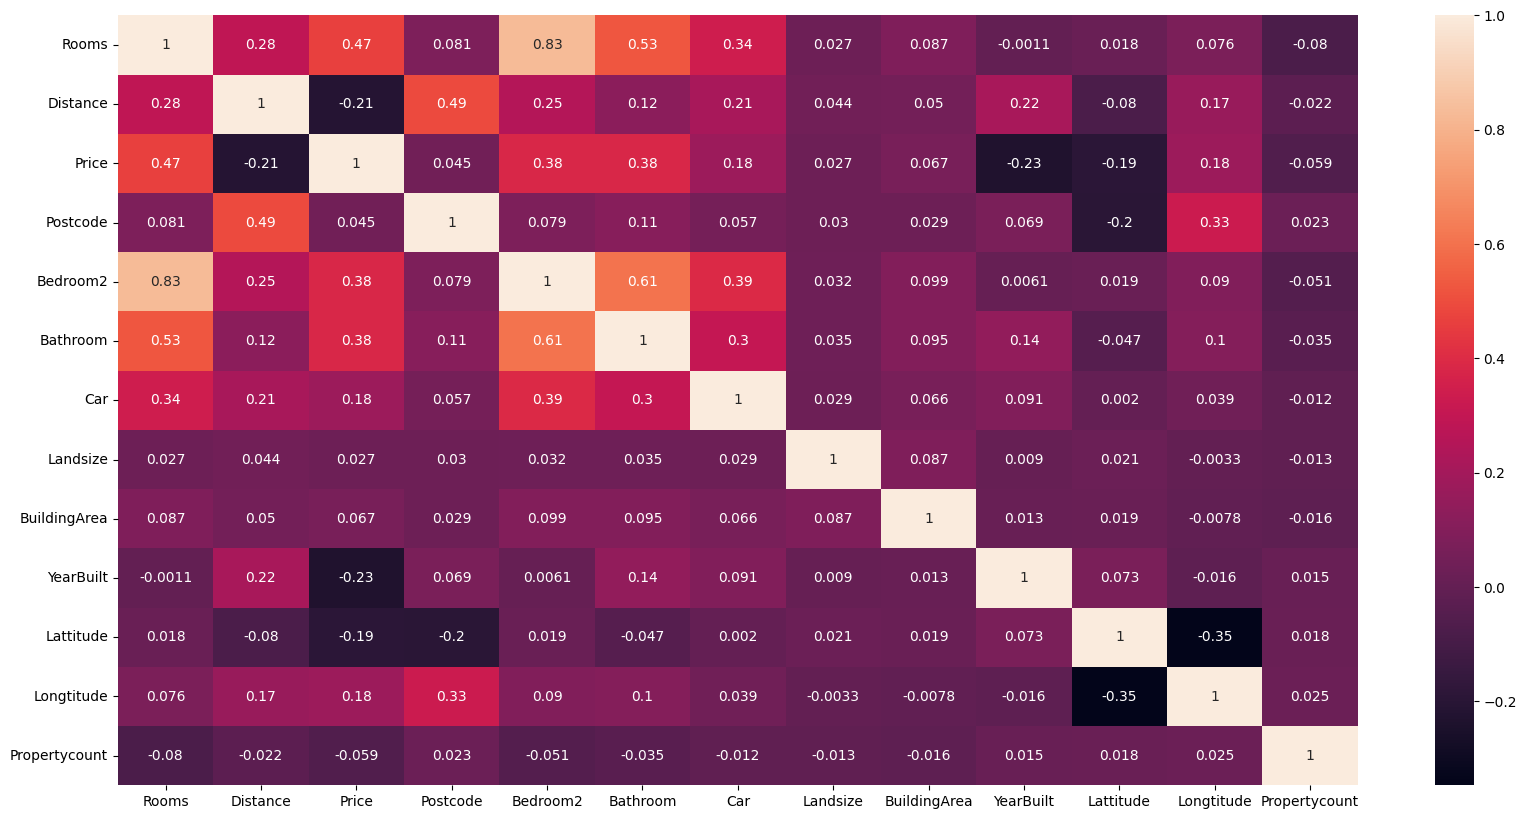

In [84]:
corr=df_new_copy.corr()
plt.figure(figsize=(20,10))

sns.heatmap(corr,annot=True)

One Hot Off Encoding

In [42]:
df_new_copy.drop("Address",inplace=True,axis=1)
df_new_copy.head()

,Suburb,Type,Method,SellerG,Date,CouncilArea,Regionname,Rooms,Distance,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,Abbotsford,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan,2,2.5,1480000.0,3067.0,2.0,1.0,1.0,202.0,156.834586,1966.609153,-37.7996,144.9984,4019.0
2,Abbotsford,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan,2,2.5,1035000.0,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,-37.8079,144.9934,4019.0
4,Abbotsford,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan,3,2.5,1465000.0,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,-37.8093,144.9944,4019.0
5,Abbotsford,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan,3,2.5,850000.0,3067.0,3.0,2.0,1.0,94.0,156.834586,1966.609153,-37.7969,144.9969,4019.0
6,Abbotsford,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan,4,2.5,1600000.0,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,-37.8072,144.9941,4019.0


In [43]:
cat_cols.remove("Address")


In [44]:
one_hot = pd.get_dummies(df_new_copy[cat_cols],drop_first=True)
one_hot.head()

,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [45]:
df_new_copy=pd.concat([one_hot,df_new_copy[num_cols]],axis=1)

Scaling and Model Training

In [46]:
X=df_new_copy.drop("Price",axis=1)
y=df_new_copy["Price"]

In [47]:
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [49]:
models_dict = {
  'Lasso': {
    'model': Lasso()
  },
  'LinearRegression': {
    'model': LinearRegression()
  },
  'Ridge': {
    'model': Ridge()
  },
  'ElasticNet': {
    'model': ElasticNet()
  },
  'KNeighborsRegressor': {
    'model': KNeighborsRegressor()
  },
  'RandomForestRegressor': {
    'model': RandomForestRegressor()
  },
  'GradientBoostingRegressor': {
    'model': GradientBoostingRegressor()
  },
  'AdaBoostRegressor': {
    'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
  }
}

In [50]:
for key, item in models_dict.items():
  model = item.get('model')

  model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+15, tolerance: 8.882e+11
  model = cd_fast.enet_coordinate_descent(


In [51]:
def regression_performance_evaluation(key,preds):
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)

  print("*** Model: ", key , ' ***')
  print("R2 Score:", r_squared)
  print('Mean Absolute Error:', mae)
  print('Mean Squared Error:', mse)
  print('Root Mean Squared Error:', rmse)

  print()


In [52]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = model.predict(X_test)

  item.update({"y_preds": y_preds})


In [53]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = item.get('y_preds')

  regression_performance_evaluation(key,y_preds)


*** Model:  Lasso  ***
R2 Score: 0.6601155218251589
Mean Absolute Error: 230769.18768081756
Mean Squared Error: 145235935467.91965
Root Mean Squared Error: 381098.32782094396

*** Model:  LinearRegression  ***
R2 Score: -4.662852644407389e+26
Mean Absolute Error: 8.38918615484263e+17
Mean Squared Error: 1.992482179227974e+38
Root Mean Squared Error: 1.4115531088938787e+19

*** Model:  Ridge  ***
R2 Score: 0.6602326738481441
Mean Absolute Error: 230686.18091758902
Mean Squared Error: 145185875271.7566
Root Mean Squared Error: 381032.64331518445

*** Model:  ElasticNet  ***
R2 Score: 0.6220993987933487
Mean Absolute Error: 232637.32209474634
Mean Squared Error: 161480593714.85568
Root Mean Squared Error: 401846.4802817808

*** Model:  KNeighborsRegressor  ***
R2 Score: 0.41711089195726203
Mean Absolute Error: 314700.0667155963
Mean Squared Error: 249074171716.36752
Root Mean Squared Error: 499073.31296751136

*** Model:  RandomForestRegressor  ***
R2 Score: 0.7792784561125274
Mean Absolu

Our most Succesful Model appeared as RandomForestRegressor